<a href="https://colab.research.google.com/github/rjin1/OMP/blob/master/NICE_Experiment_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.io import loadmat
from scipy.io import savemat
import matplotlib.pyplot as plt


In [ ]:
def Gen_Source(loc_filename = './drive/MyDrive/NICE_JupyterNotebook/DistributionParams/GumbelLocatParams.mat', loc_varname = 'locat_param', 
               scale_filename = './drive/MyDrive/NICE_JupyterNotebook/DistributionParams/GumbelScaleParams.mat', sacle_varname = 'scale_param', N_sample = 7668, seed = 1):
  
  loc = loadmat(loc_filename)[loc_varname].astype(np.float64)
  scale = loadmat(scale_filename)[sacle_varname].astype(np.float64)

  # Assume the loc and scale are in same format (N_source x 1)
  N_source = loc.shape[0]
  S = np.zeros((N_source, N_sample), np.float64)

  # Control the RNG for repro
  np.random.seed(seed)
  for i in range(N_source):
    S[i,:] = np.random.gumbel(loc[i,0], scale[i,0], (1, N_sample))

  return S

In [ ]:
def Gen_Mixture(S, ratio=1):
  # Assume S is in np.array format
  N_source_sample = S.shape
  X = np.zeros((N_source_sample[0], N_source_sample[1]), np.float64)

  for i in range(N_source_sample[1]):
    for j in range(N_source_sample[0]):
      X[j,i] = S[j,i] + ratio * (S[j,i] * (np.sum(S[:,i]) - S[j,i]) + np.sum(S[:,i] ** 2) - S[j,i] ** 2)

  return X 

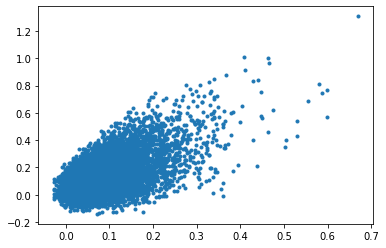

In [ ]:
# S = Gen_Source()
# X = Gen_Mixture(S)
# i = 2
# plt.plot(X[1,:],X[4,:],'.')
# plt.hist(S[i,:], density=True, bins='auto')

In [ ]:
def train_validation